In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.read_csv("netflix_titles.csv")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [3]:
df=pd.read_csv("netflix_titles.csv")

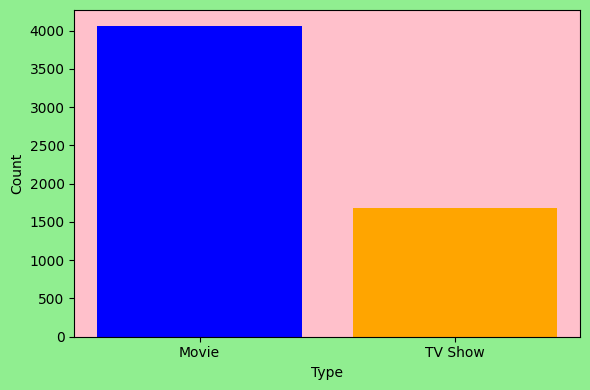

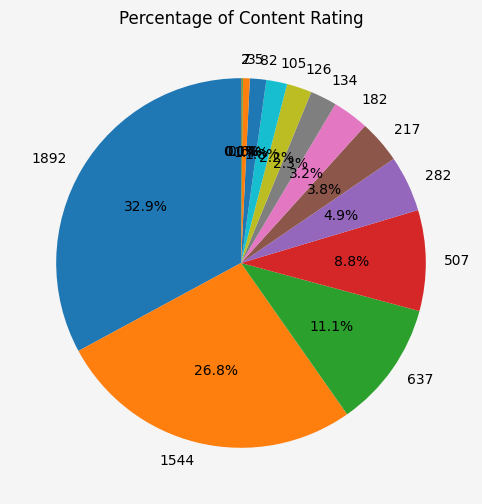

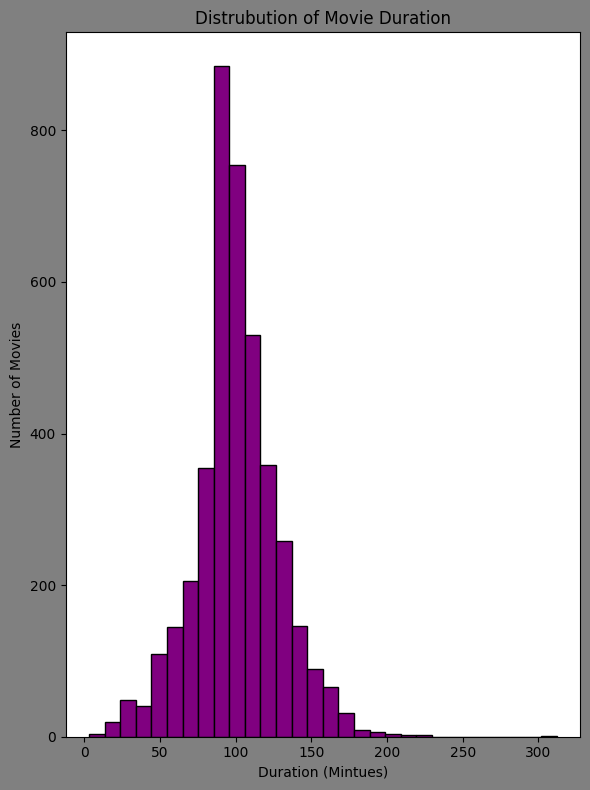

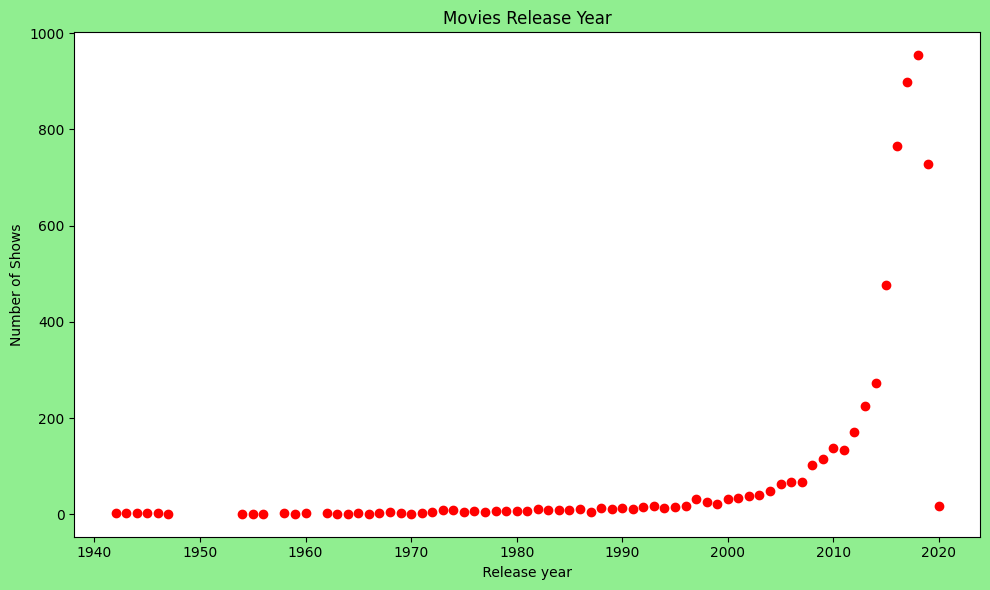

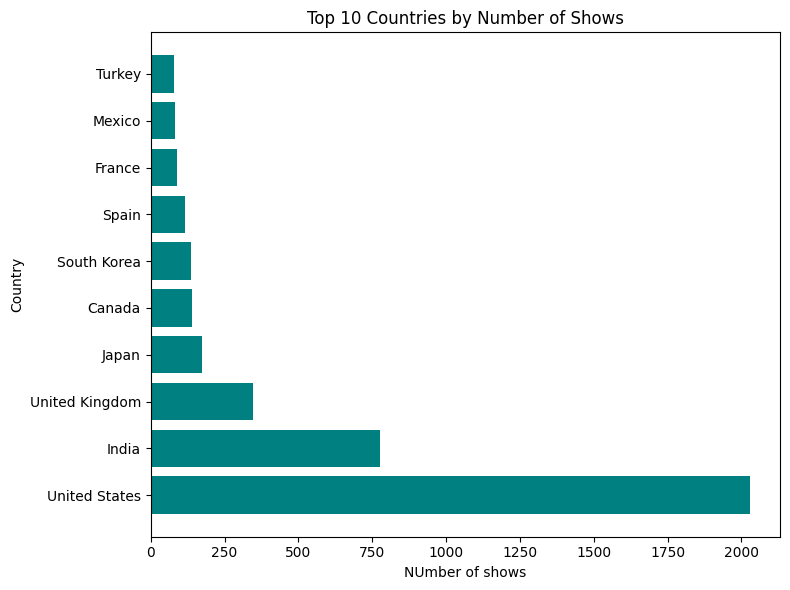

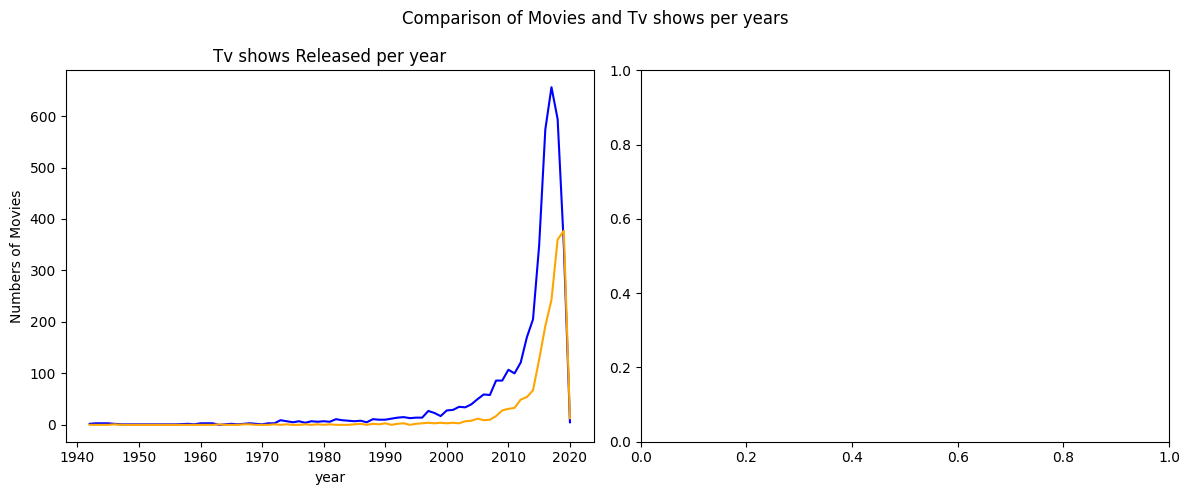

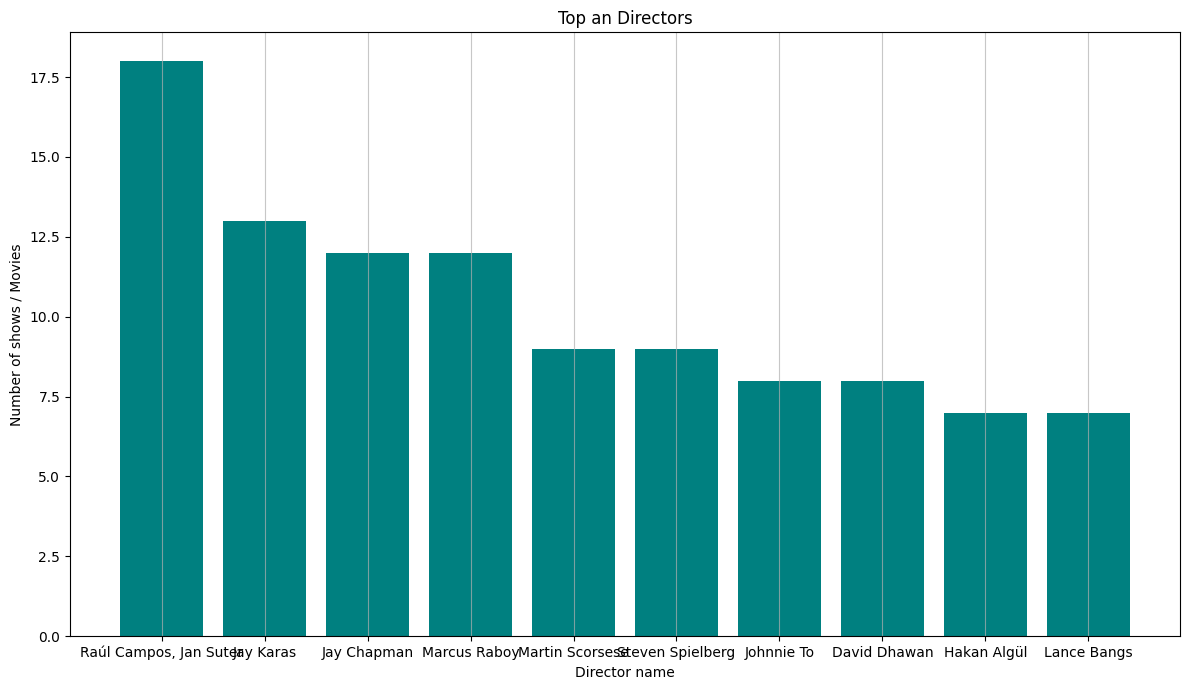

In [8]:
# Clean data
df =df.dropna(subset=['type' , 'release_year' , 'rating' , 'country' , 'duration'])
type_counts = df['type'].value_counts()

plt.figure(figsize=(6,4) , facecolor='lightgreen')
plt.gca().set_facecolor('pink') # use for background colour
plt.bar(type_counts.index, type_counts.values , color=['blue','orange'] )
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('Movies vs tv show')
plt.show()

#---------------------------------------------------------------------------------------------------------------

# Now check rating count in pie charts
rating_counts = df['rating'].value_counts()
plt.figure(figsize=(8,6) , facecolor=('whitesmoke'))

# IF you want to choose color so use (custom_color['--','---']) i don't choose color

plt.pie(rating_counts , labels=rating_counts ,autopct='%1.1f%%', startangle = 90 )
plt.title('Percentage of Content Rating')
plt.savefig('percentage of content rating')
plt.tight_layout
plt.show()

#-----------------------------------------------------------------------------------------------------------

# Movie

movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace(' min',' ').astype(int)

plt.figure(figsize=(6,8) , facecolor=('grey'))
plt.hist(movie_df['duration_int'], bins=30, color='purple',edgecolor='black')
plt.title('Distrubution of Movie Duration')
plt.xlabel('Duration (Mintues)')
plt.ylabel('Number of Movies')
plt.savefig("Movie duration histogram.png")
plt.tight_layout()
plt.show()

#----------------------------------------------------------------------------------------------------------

# Release Year

release_counts = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(10,6) , facecolor='lightgreen')
plt.scatter(release_counts.index , release_counts.values, color='red')
plt.title('Movies Release Year')
plt.xlabel(' Release year ')
plt.ylabel('Number of Shows')
plt.savefig('Movies release')
plt.tight_layout()
plt.show()

#---------------------------------------------------------------------------------------------------------------

# Top 10 country 

country_counts = df['country'].value_counts().head(10)

plt.figure(figsize=(8,6))
plt.barh(country_counts.index , country_counts.values , color='teal')
plt.title('Top 10 Countries by Number of Shows')
plt.xlabel('NUmber of shows')
plt.ylabel('Country')
plt.savefig('Top 10 country')
plt.tight_layout()
plt.show()

#----------------------------------------------------------------------------------------------------------------

# Sbplot movies vs tv shows per year

content_by_year = df.groupby(['release_year' , 'type']).size().unstack().fillna(0)

fig, ax = plt.subplots(1,2, figsize=(12,5))

# Frist subplot : moives
ax[0].plot(content_by_year.index , content_by_year['Movie'], color ='blue')
ax[0].set_title('Movies Released per year')
ax[0].set_xlabel('year')
ax[0].set_ylabel('Number of Movies')

# Second subpolt : Tv shows

ax[0].plot(content_by_year.index , content_by_year['TV Show'] , color='orange')
ax[0].set_title('Tv shows Released per year')
ax[0].set_xlabel('year')
ax[0].set_ylabel('Numbers of Movies')
fig.suptitle('Comparison of Movies and Tv shows per years')
plt.tight_layout()
plt.savefig("Movies vs tv shows")
plt.show()

#------------------------------------------------------------------------------------------------------------------

# Remove NaN , Top directors etc.

df_director = df.dropna(subset=['director']).copy()
director_counts = df_director['director'].value_counts() 
top_n_director = 10
top_director =director_counts.head(top_n_director)

plt.figure(figsize=(12 ,7))
plt.bar(top_director.index , top_director.values, color='teal')
plt.title('Top an Directors')
plt.xlabel("Director name")
plt.ylabel('Number of shows / Movies')
plt.grid(axis='x'  , alpha=0.7) #  linestyle='--'  as you wish to use
plt.savefig("Top Directors")
plt.tight_layout()
plt.show()